# 3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. (a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("random_points.csv")
df

,x,y
0,2.648456,3.247346
1,3.841770,2.266049
2,4.247251,3.615904
3,2.464908,3.247842
4,2.527401,2.878479
5,2.623405,3.310913
6,3.034023,2.921393
7,2.767309,3.757842
8,1.656231,2.539570
9,2.833405,1.089025


In [28]:
df['label'] = [0] * 10 + [1] * (len(df) - 10)
df

,x,y,label
0,2.648456,3.247346,0
1,3.841770,2.266049,0
2,4.247251,3.615904,0
3,2.464908,3.247842,0
4,2.527401,2.878479,0
5,2.623405,3.310913,0
6,3.034023,2.921393,0
7,2.767309,3.757842,0
8,1.656231,2.539570,0
9,2.833405,1.089025,0


In [29]:
X = df[['x', 'y']]
y = df['label']
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21, 2)
X_test shape: (9, 2)
y_train shape: (21,)
y_test shape: (9,)


In [31]:
# Define the logistic regression model function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid(X @ theta)

def logistic_regression(X, y, lr, epochs):
    # Add intercept term to X
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))

    # Initialize theta
    theta = np.zeros(X.shape[1])

    for epoch in range(epochs):
        # Compute predictions
        h = predict(X, theta)

        # Compute gradient
        gradient = X.T @ (h - y) / len(y)

        # Update theta using gradient descent
        theta -= lr * gradient

    return theta


In [32]:
# Define evaluation metrics
def evaluate_metrics(y_true, y_pred):
    # Calculate True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate Precision, Recall, F1-Score, Accuracy
    P = TP / (TP + FP) if (TP + FP) != 0 else 0
    R = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (P * R) / (P + R) if (precision + recall) != 0 else 0
    acc = (TP + TN) / len(y_true)
    return P, R, f1, acc


In [71]:
# Train logistic regression model
learning_rate = 0.1
num_epochs = 1000
theta = logistic_regression(X_train.values, y_train.values, learning_rate, num_epochs)


In [72]:
# Predict using the trained model on test data
X_test_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test.values))
y_pred_test = predict(X_test_intercept, theta) >= 0.5

# Evaluate metrics
precision, recall, f1_score, accuracy = evaluate_metrics(y_test.values, y_pred_test)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Accuracy: {accuracy*100:.1f}%")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 100.0%


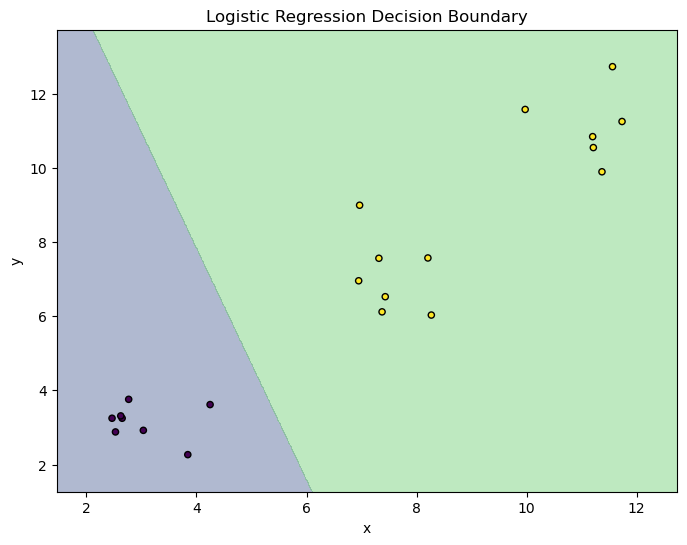

In [78]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X_train['x'].min() - 1, X_train['x'].max() + 1
y_min, y_max = X_train['y'].min() - 1, X_train['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
intercept_mesh = np.ones((X_mesh.shape[0], 1))
X_mesh = np.hstack((intercept_mesh, X_mesh))
Z = predict(X_mesh, theta)>= 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,cmap='viridis')
plt.scatter(X_train['x'], X_train['y'], c=y_train.values, s=20, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.show()


In [68]:
# Define the gradient descent function for logistic regression with L2 regularization
def gradient_descent_regularized(X, y, lr, epochs, alpha):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.hstack((intercept, X))
    theta = np.zeros(n + 1)

    for epoch in range(epochs):
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = (X.T.dot(h - y) + alpha * theta) / m  # Regularized gradient
        theta -= lr * gradient

    return theta

# Assuming X_train and y_train are already defined from the previous steps
learning_rate = 0.1
num_epochs = 1000
alpha = 0.1  # Regularization parameter
theta_with_reg = gradient_descent_regularized(X_train.values, y_train.values, learning_rate, num_epochs, alpha)


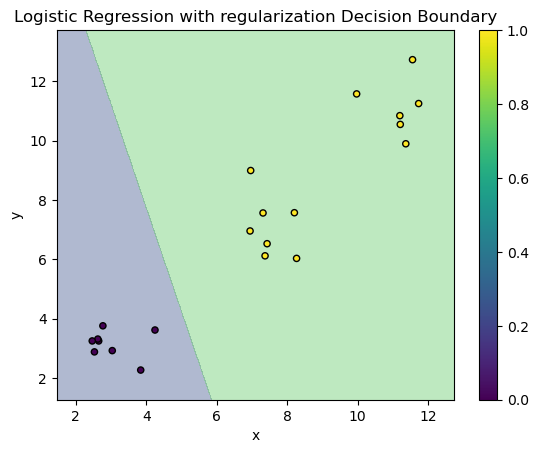

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 100.0%


In [76]:
Z = predict(X_mesh, theta_with_reg)>= 0.5
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train['x'], X_train['y'], c=y_train.values, s=20, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression with regularization Decision Boundary')
plt.show()

# Predict using the trained model on test data
X_test_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test.values))
y_pred_test_reg = predict(X_test_intercept, theta_with_reg) >= 0.5

# Evaluate metrics
precision, recall, f1_score, accuracy = evaluate_metrics(y_test.values, y_pred_test_reg)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Accuracy: {accuracy*100}%")
